## Loading library

*Tensor Flow* library is a requirement to Keras. To install it do: `pip3 install tensorflow`.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
keras.__version__

'2.5.0'

## Loading dataset using Pandas

In [3]:
import pandas as pd

In [4]:
data_train_file = 'data/fashion-mnist_train.csv.gz'
data_test_file = 'data/fashion-mnist_test.csv.gz'

# this method returns a pandas DataFrame object "pandas.core.frame.DataFrame"
data_train = pd.read_csv(data_train_file)
data_test = pd.read_csv(data_test_file)

print(data_train.shape)
data_train.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Treating data

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

# This function slices a panda data frame into two arrays. The first with labels and the other with
# all samples and their features - one by line. 
def treat_raw_data_frame(data_frame):
    # data is normalized to the max valua a pixel can take (255) - Gray Scale
    # each sample is a 28x28 array serialized
    features = data_frame.values[:, 1:]/255

    # This normalization ([0-1]) can also be done by using sklearn
    scaler = MinMaxScaler(feature_range=(0,1))
    fatures = scaler.fit_transform(data_frame.values[:, 1:])
    
    labels = data_frame.label.values

    # transforming labels to "one-hot" encoding
    # if We use sparse_categorical_crossentropy we do not need to one-hot encoding our labels
#    labels = tf.keras.utils.to_categorical(labels)
    return shuffle(labels, features)

train_labels, train_features = treat_raw_data_frame(data_train)
test_labels, test_features = treat_raw_data_frame(data_test)

print("Shape of trainning feature dataset: {}".format(train_features.shape))
print("Shape of trainning labels dataset: {}".format(train_labels.shape))

Shape of trainning feature dataset: (60000, 784)
Shape of trainning labels dataset: (60000,)


In [6]:
train_features[0, 90:110]

array([0.        , 0.        , 0.00392157, 0.        , 0.        ,
       0.        , 0.00784314, 0.        , 0.        , 0.        ,
       0.24313725, 0.19215686, 0.        , 0.        , 0.        ,
       0.00392157, 0.00784314, 0.        , 0.        , 0.00392157])

## Visualizing samples using matplotlib

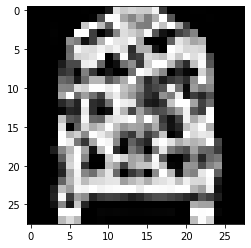

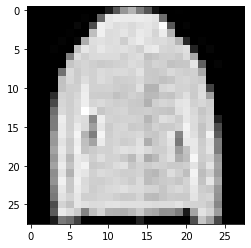

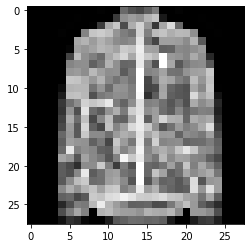

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This functions plots a sample rechape array into a 28x28 2 dimensional array
def plot(data_set, index):
    plt.figure()
    plt.imshow(np.reshape(data_set[index, :], (28,28)), "gray")


_count = 0
for i in range(len(train_labels)):
    if train_labels[i] == 4:
        plot(train_features, i)
        _count += 1
    if _count == 3:
        break


## Designing the Model

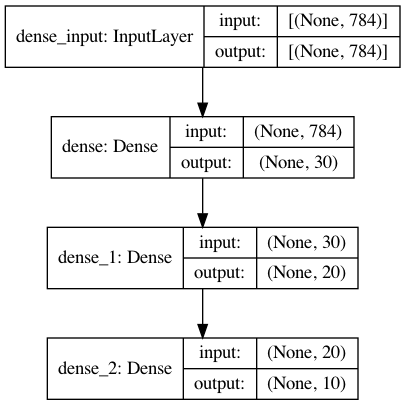

In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Define a sequential model. This defines the way Keras will generate a model. Keras has three different
# type of models: sequential, functional and subclassing [3].
model = tf.keras.Sequential()

# Two hidden layers, activation function is rectified linear unit
# all activation functions can be found at [4]. [5] to read more about about
# Keras layers
model.add(tf.keras.layers.Dense(30, activation=tf.nn.relu, input_shape=(784,))) # 1st hidden layer
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))                     # 2nd hidden layer

# Output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # softmax gives probability to each class classes

# Keras provides resource for plotting the Neural Network architecture and parameters.
tf.keras.utils.plot_model(model, show_shapes=True)

## Trainning (fit), validating (validation_split param) and Testing (evaluate) the Model

In [9]:
# This specifies parameters for training the model and evaluate training progress
# to learn more about optimizers [9]
# model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
model.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# prints summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Trainning model == fit function
EPOCHS=10
BATCH_SIZE=128

# Using last 10% as validation set make sure data is suffled beforehand
model.fit(train_features, train_labels, validation_split=0.1, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 0.6908 - accuracy: 0.7681 - val_loss: 0.5463 - val_accuracy: 0.7995
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.4779 - accuracy: 0.8312 - val_loss: 0.4577 - val_accuracy: 0.8412
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.4368 - accuracy: 0.8450 - val_loss: 0.4387 - val_accuracy: 0.8503
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.4141 - accuracy: 0.8535 - val_loss: 0.4212 - val_accuracy: 0.8520
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.3949 - accuracy: 0.8585 - val_loss: 0.4329 - val_accuracy: 0.8477
Epoch 6/10
422/422 [==============================] - 1s 2ms/step - loss: 0.3826 - accuracy: 0.8651 - val_loss: 0.3995 - val_accuracy: 0.8608
Epoch 7/10
422/422 [==============================] - 1s 2ms/step - loss: 0.3700 - accuracy: 0.8680 - val_loss: 0.4060 - val_accuracy: 0.8598
Epoch 

In [11]:
# Validating model
test_loss, test_acc = model.evaluate(test_features, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.8698


In [12]:
test_acc, test_loss

(0.8697999715805054, 0.37162408232688904)

## Confusion Matrix

In [13]:
# Helps to visualize mistakes in evaluating data.  
from sklearn.metrics import confusion_matrix
import itertools

[[856   2  25  49   0   1  53   0  13   1]
 [  3 979   0  15   0   2   1   0   0   0]
 [ 14   2 871  14  69   0  26   0   4   0]
 [ 15  21   8 923  19   1  10   0   3   0]
 [  0   2 138  38 797   0  22   0   3   0]
 [  2   0   0   2   0 930   1  49   5  11]
 [187   5 145  55  93   0 502   0  13   0]
 [  0   0   0   0   0  23   0 942   2  33]
 [  2   0  13   5   3   1   7   3 965   1]
 [  0   0   0   0   0  18   0  47   2 933]]


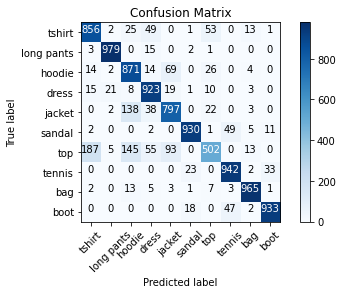

In [14]:
# This function was C&P from [10]
def plot_confusion_matrix(cm, classes,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_true=test_labels, y_pred=model.predict(test_features, verbose=0).argmax(axis=-1))
print(cm)

cm_plot_labels = ["tshirt", "long pants", "hoodie", "dress", "jacket", "sandal", "top", "tennis", "bag", "boot"]
plot_confusion_matrix(cm, classes=cm_plot_labels, title="Confusion Matrix")

## Feeding one sample to model and getting prediction/classification

In [15]:
# Fetching sample from testing dataset
sample = test_features[21:22, :]

In [16]:
# Correct label for first sample in the testing dataset
test_labels[21:22]

array([0])

In [17]:
model.predict(sample)

array([[9.78848219e-01, 2.40513282e-06, 8.70306278e-04, 1.81948487e-03,
        7.75137960e-05, 2.41280780e-12, 1.82713885e-02, 5.73871950e-13,
        1.10787674e-04, 9.61446200e-11]], dtype=float32)

In [18]:
# Returns the index of the max value in the "one-hot" array
model.predict(sample).argmax(axis=-1)

array([0])

## <span style="color:red">[!]</span>  Problematic #001 <span style="color:red">[!]</span>

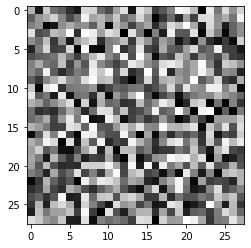

In [19]:
# Creating sample with random features
fake_sample = np.random.rand(*test_features[0:1, :].shape)
plt.figure()
_ = plt.imshow(np.reshape(fake_sample, (28,28)), "gray")

In [20]:
# Model try to fit random generated sample to some known category 
model.predict(fake_sample)

array([[8.1957784e-05, 1.8216172e-10, 8.7932440e-06, 2.9752090e-09,
        4.3284601e-08, 9.0442376e-11, 1.3808460e-05, 2.9225252e-13,
        9.9989533e-01, 2.5435805e-08]], dtype=float32)

In [21]:
model.predict(fake_sample).argmax()

8

## Saving/Loading model

In [22]:
# Serializes model in disk. The serialized format is a directory. [8]
model.save('example_001.h5')

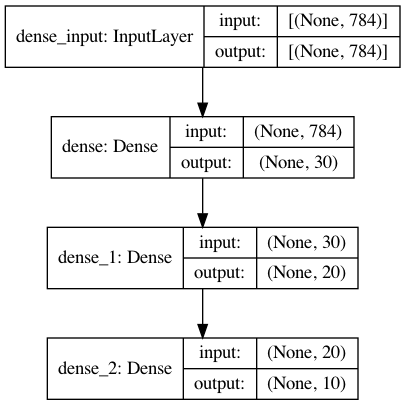

In [23]:
model_02 = keras.models.load_model('example_001.h5')
tf.keras.utils.plot_model(model_02, show_shapes=True)

In [24]:
# saves model's architecture to JSON (you can do the same to YAML)
model_arch_json = model.to_json()
model_arch_json

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 30, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 20, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bi

In [25]:
model_03 = tf.keras.models.model_from_json(model_arch_json)
model_03.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [26]:
# it is possible also to only export weights. This can be useful in case low-cost 
# transfering trainning models that the architecture is known beforehand. 
model_02.save_weights('model_02_weights.h5')
model_03.load_weights('model_02_weights.h5')
print(model_03.get_weights()[0])
print(model_02.get_weights()[0])

[[ 0.02260692 -0.01666768  0.13852702 ... -0.1671342   0.08657092
  -0.05684505]
 [-0.0664055  -0.07391224 -0.06132434 ...  0.16056067 -0.10717325
   0.14041376]
 [ 0.01570951  0.12608396 -0.09698111 ...  0.23057753 -0.11113232
   0.2946115 ]
 ...
 [ 0.07986436 -0.0796359  -0.1210933  ...  0.01675346 -0.14408416
  -0.14112632]
 [-0.07324704  0.05661253 -0.05826692 ... -0.04549002 -0.13983114
   0.03069886]
 [ 0.03820135  0.06572829  0.05526852 ...  0.01040674 -0.18890607
   0.07788788]]
[[ 0.02260692 -0.01666768  0.13852702 ... -0.1671342   0.08657092
  -0.05684505]
 [-0.0664055  -0.07391224 -0.06132434 ...  0.16056067 -0.10717325
   0.14041376]
 [ 0.01570951  0.12608396 -0.09698111 ...  0.23057753 -0.11113232
   0.2946115 ]
 ...
 [ 0.07986436 -0.0796359  -0.1210933  ...  0.01675346 -0.14408416
  -0.14112632]
 [-0.07324704  0.05661253 -0.05826692 ... -0.04549002 -0.13983114
   0.03069886]
 [ 0.03820135  0.06572829  0.05526852 ...  0.01040674 -0.18890607
   0.07788788]]


## Convolutional Neural Networks

### Importing Libraries

In [27]:
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.applications.vgg16 as vgg16

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Checking Phsical Devices

In [28]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [29]:
tf.config.experimental.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

### Treating/Loading Image Dataset

In [30]:
train_path = 'data/cats_vs_dogs/train'
valid_path = 'data/cats_vs_dogs/valid'
test_path = 'data/cats_vs_dogs/test'

train_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)
train_batches = train_batches.flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)
valid_batches = valid_batches.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)
test_batches = test_batches.flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [31]:
# Grabing one single batch
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

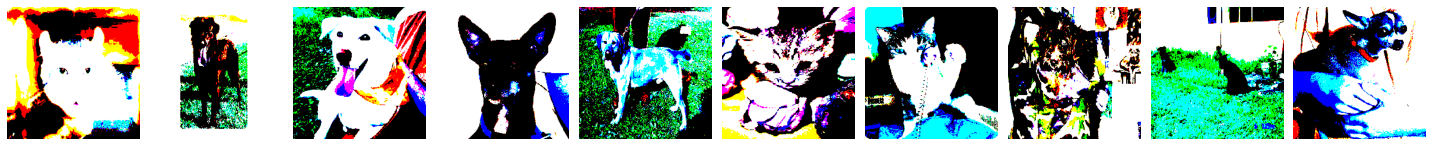

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [32]:
# Auxiliar function for ploting sample
def plot(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot(imgs)
print(labels)

### Designing Model

In [33]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Flatten())
# Softmax turn outputs into probabilities
model.add(Dense(units=2, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

### Training and Validation Model

In [34]:
# loss measurement can be binary_crossentropy but categorical_crossentropy is more general
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
# Ys (truth data) is already inside the train_batches
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 35s - loss: 13.9410 - accuracy: 0.5430 - val_loss: 5.4120 - val_accuracy: 0.6150
Epoch 2/10
100/100 - 41s - loss: 2.5671 - accuracy: 0.7610 - val_loss: 2.1709 - val_accuracy: 0.6750
Epoch 3/10
100/100 - 49s - loss: 0.4211 - accuracy: 0.8950 - val_loss: 2.7639 - val_accuracy: 0.6150
Epoch 4/10
100/100 - 36s - loss: 0.1324 - accuracy: 0.9650 - val_loss: 2.1652 - val_accuracy: 0.6550
Epoch 5/10
100/100 - 34s - loss: 0.0481 - accuracy: 0.9860 - val_loss: 2.0906 - val_accuracy: 0.6650
Epoch 6/10
100/100 - 34s - loss: 0.0067 - accuracy: 0.9980 - val_loss: 1.9903 - val_accuracy: 0.6750
Epoch 7/10
100/100 - 39s - loss: 8.4587e-04 - accuracy: 1.0000 - val_loss: 2.0041 - val_accuracy: 0.6850
Epoch 8/10
100/100 - 36s - loss: 5.8197e-04 - accuracy: 1.0000 - val_loss: 2.0031 - val_accuracy: 0.6850
Epoch 9/10
100/100 - 34s - loss: 4.6619e-04 - accuracy: 1.0000 - val_loss: 2.0073 - val_accuracy: 0.6850
Epoch 10/10
100/100 - 39s - loss: 3.8671e-04 - accuracy: 1.0000 - val_loss: 2.

**100% accuracy and 68% validation accuracy == overfiting!** :(((

### Testing Model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

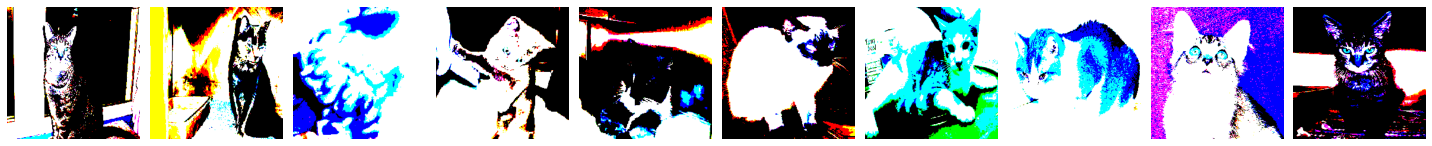

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [36]:
# Grabing one single batch
imgs, labels = next(test_batches)
plot(imgs)
labels

In [37]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [38]:
predictions = model.predict(x=test_batches, verbose=0)
# Printing the 10 first predictions
np.round(predictions[0:10, : ])

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [39]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

[[35 15]
 [13 37]]


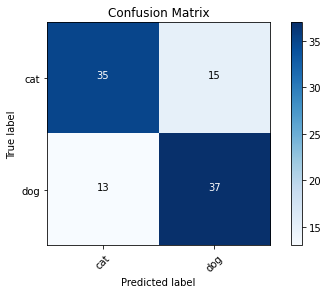

In [40]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
print(cm)
cm_plot_labels = ["cat", "dog"]
plot_confusion_matrix(cm, classes=cm_plot_labels, title="Confusion Matrix")

### Reusing Architectures/Models (VGG)

VGG  [13] is a specific architecture of Convolutional Neural Network proposed by Simonyan et al [14] which uses "many" hidden layers (16 to 19) and very small convolution filters (`3x3`). Models trainning using this architecture have been used in large-scale applications of image recognition.

"*In this work we investigate the effect of the convolutional network depth on its accuracy in the large-scale image recognition setting. Our main contribution is a thorough evaluation of networks of increasing depth using an architecture with very small (3x3) convolution filters, which shows that a significant improvement on the prior-art configurations can be achieved by pushing the depth to 16-19 weight layers. These findings were the basis of our ImageNet Challenge 2014 submission, where our team secured the first and the second places in the localisation and classification tracks respectively. We also show that our representations generalise well to other datasets, where they achieve state-of-the-art results. We have made our two best-performing ConvNet models publicly available to facilitate further research on the use of deep visual representations in computer vision.*"

The VGG16 image pre-processing filter is the resulting of subtracting the mean for each color with all pixels in the image (this leads to negative values).

In [41]:
# This will download the model from an online archive of deep neural net models. This model was trainned for 
# classifying 1000 classes of images and it takes 500 MB of space in disk. lol

vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [42]:
# Clonning model and changing last layer to only 2 outputs (cats and dogs)
model = tf.keras.Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

# Freezing weights and biases of all layers (excepts the output layer which we will still add to the model)
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [43]:
# Adding new output layer with only two classes
model.add(Dense(units=2, activation="softmax"))


In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [45]:
# original vgg16 model uses a functional architecture
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [46]:
# Our model is using the less complex model type "Sequential"
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [47]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [48]:
# Training model
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 282s - loss: 0.3486 - accuracy: 0.8530 - val_loss: 0.1082 - val_accuracy: 0.9450
Epoch 2/5
100/100 - 274s - loss: 0.0961 - accuracy: 0.9700 - val_loss: 0.0689 - val_accuracy: 0.9600
Epoch 3/5
100/100 - 272s - loss: 0.0641 - accuracy: 0.9800 - val_loss: 0.0529 - val_accuracy: 0.9800
Epoch 4/5
100/100 - 294s - loss: 0.0456 - accuracy: 0.9880 - val_loss: 0.0480 - val_accuracy: 0.9900
Epoch 5/5
100/100 - 284s - loss: 0.0354 - accuracy: 0.9900 - val_loss: 0.0439 - val_accuracy: 0.9950


In [49]:
predictions = model.predict(x=test_batches, verbose=0)
# Printing the 10 first predictions
np.round(predictions[0:10, : ])

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [50]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

[[48  2]
 [ 2 48]]


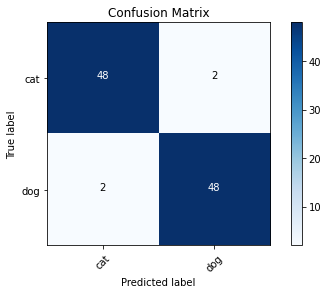

In [51]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
print(cm)
cm_plot_labels = ["cat", "dog"]
plot_confusion_matrix(cm, classes=cm_plot_labels, title="Confusion Matrix")

## MobileNets

MobileNet are models designed with performance in mind [16][17]. Great to mobile devices. This happens because this kind of models have significant less parameters than models like VGG16.

In [52]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
mobile = tf.keras.applications.mobilenet.MobileNet()

In [53]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [54]:
type(mobile)

tensorflow.python.keras.engine.functional.Functional

In [55]:
def prepare_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    # Adds one extra dimention to array
    img_array = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array)

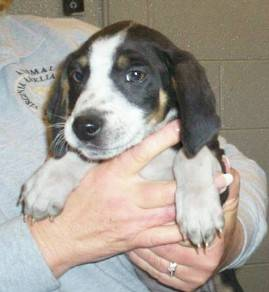

In [56]:
from IPython.display import Image
img_path="data/cats_vs_dogs/train/dog/dog.10.jpg"
Image(filename=img_path, width=300, height=200)

In [57]:
sample_data = prepare_image(img_path)
result = mobile.predict(sample_data)
result = imagenet_utils.decode_predictions(result)
result

[[('n02088238', 'basset', 0.28345695),
  ('n02089867', 'Walker_hound', 0.14968391),
  ('n02107574', 'Greater_Swiss_Mountain_dog', 0.13343248),
  ('n02088632', 'bluetick', 0.1183553),
  ('n02102177', 'Welsh_springer_spaniel', 0.06255453)]]

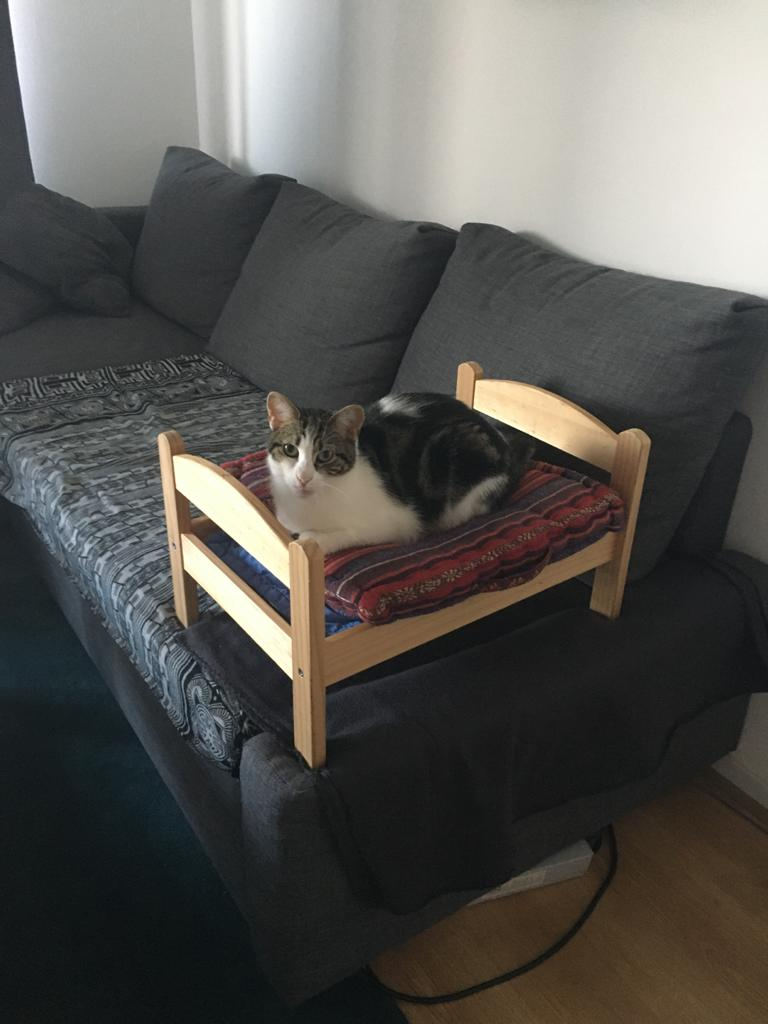

In [58]:
img_path="data/albano/sample.1.jpg"
Image(filename=img_path, width=300, height=200)

In [59]:
sample_data = prepare_image(img_path)
result = mobile.predict(sample_data)
result = imagenet_utils.decode_predictions(result)
result

[[('n04344873', 'studio_couch', 0.57057273),
  ('n03938244', 'pillow', 0.16564234),
  ('n02107312', 'miniature_pinscher', 0.050264467),
  ('n03794056', 'mousetrap', 0.02129105),
  ('n04380533', 'table_lamp', 0.020003758)]]

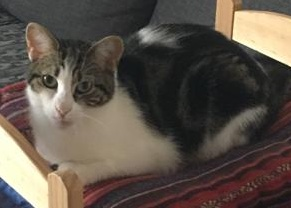

In [60]:
img_path="data/albano/sample.2.jpg"
Image(filename=img_path, width=300, height=200)

In [61]:
sample_data = prepare_image(img_path)
result = mobile.predict(sample_data)
result = imagenet_utils.decode_predictions(result)
result

[[('n02124075', 'Egyptian_cat', 0.3814213),
  ('n02123159', 'tiger_cat', 0.22607389),
  ('n02123045', 'tabby', 0.18177053),
  ('n02123597', 'Siamese_cat', 0.0121506285),
  ('n02096585', 'Boston_bull', 0.012111069)]]

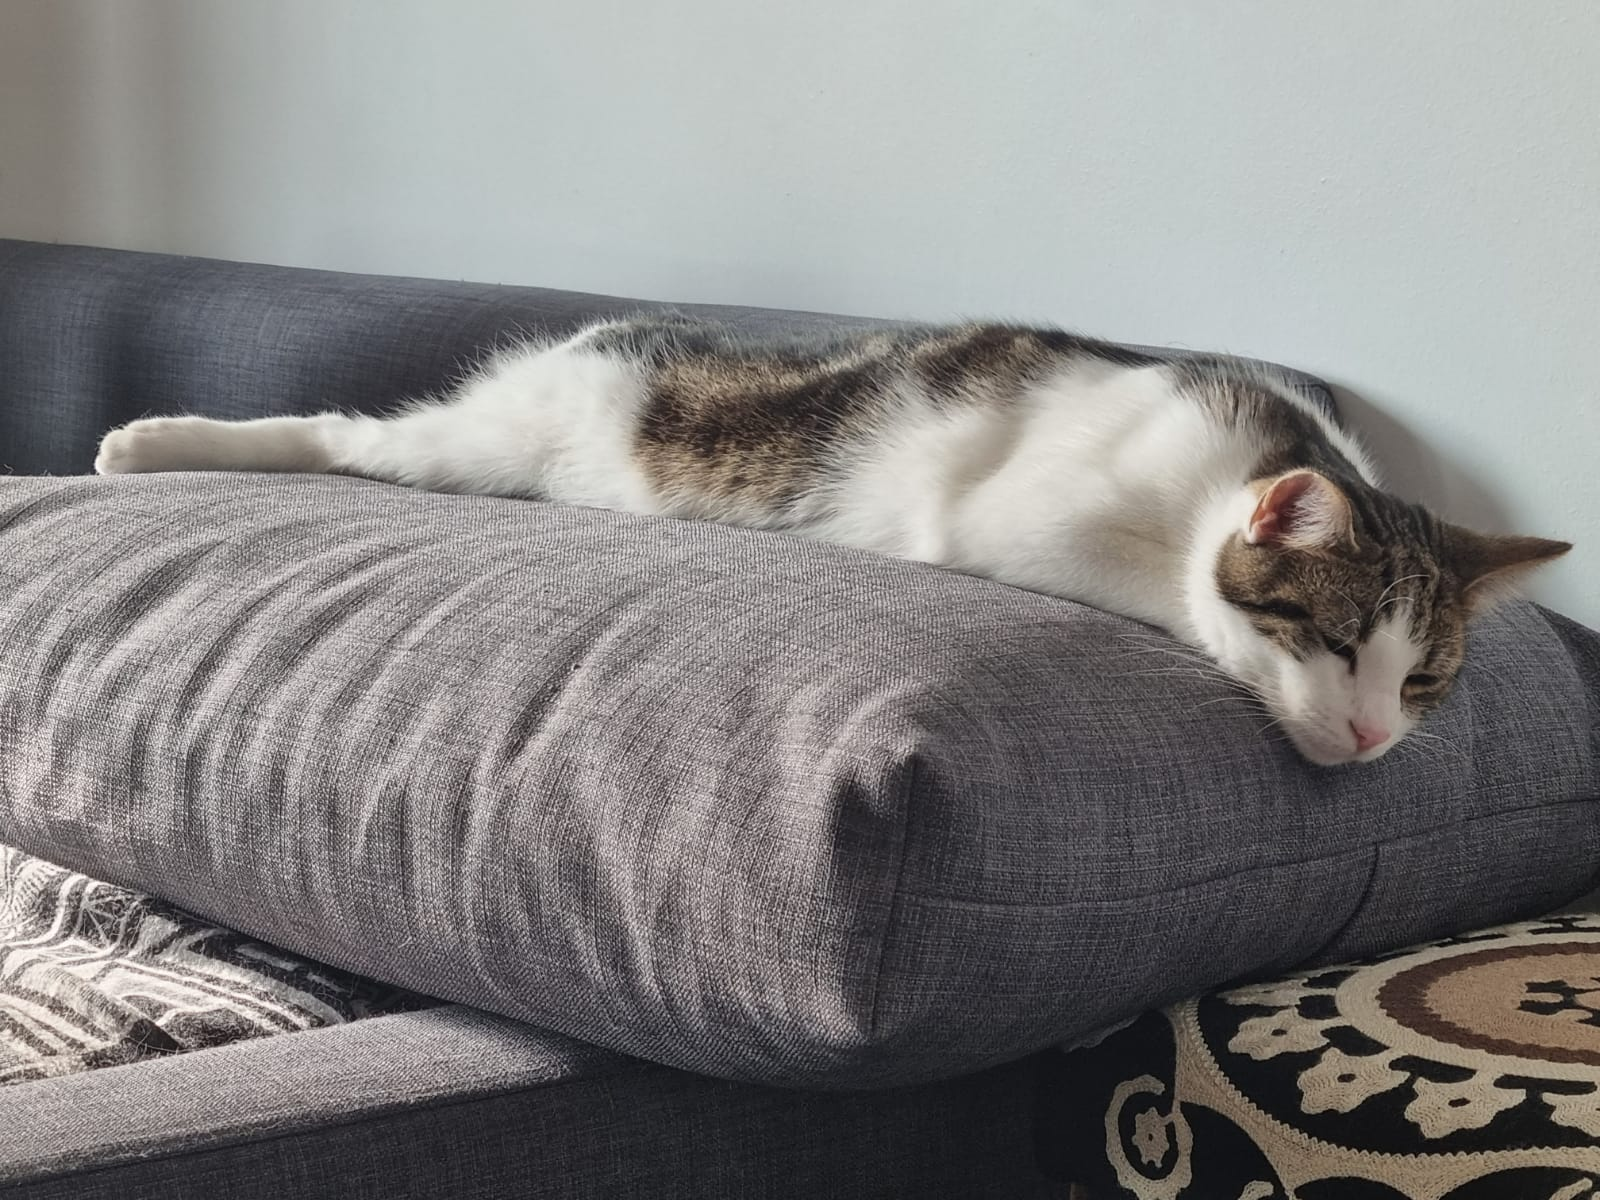

In [62]:
img_path="data/albano/sample.4.jpg"
Image(filename=img_path, width=300, height=200)

In [63]:
sample_data = prepare_image(img_path)
result = mobile.predict(sample_data)
result = imagenet_utils.decode_predictions(result)
result

[[('n02123159', 'tiger_cat', 0.55843985),
  ('n02123045', 'tabby', 0.3181151),
  ('n02110806', 'basenji', 0.043682236),
  ('n02124075', 'Egyptian_cat', 0.016456012),
  ('n02364673', 'guinea_pig', 0.0066143624)]]

### Same Problematic With Random Generated Sample

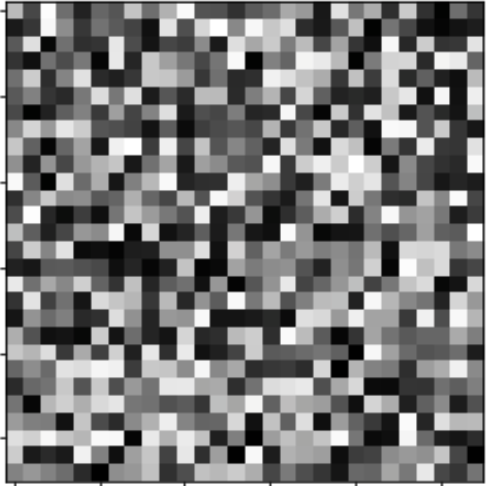

In [64]:
img_path="data/random/sample.1.png"
Image(filename=img_path, width=300, height=200)

In [65]:
sample_data = prepare_image(img_path)
result = mobile.predict(sample_data)
result = imagenet_utils.decode_predictions(result)
result

[[('n02489166', 'proboscis_monkey', 0.32788473),
  ('n03447721', 'gong', 0.12555538),
  ('n06785654', 'crossword_puzzle', 0.0773528),
  ('n03000247', 'chain_mail', 0.075701855),
  ('n02130308', 'cheetah', 0.06774355)]]

## Fine-Tuning MobileNet Model

This model will be training with a sign language dataset [15].

In [66]:
train_path = "data/sign_language/train"
valid_path = "data/sign_language/valid"
test_path = "data/sign_language/test"

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)
train_batches = train_batches.flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)
valid_batches = valid_batches.flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)
test_batches = test_batches.flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [67]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [68]:
len(mobile.layers)

92

### Modify Model

In [69]:
from tensorflow.keras.models import Model
# This will be the last layer we will steal from MobileNet
# The tutorial says this is an "experimental" decision.
# Need to investigate this further.
x = mobile.layers[-6]

# Creating a new output layer in the Functional model and define how it is connected
# to the main Model.
output = Dense(units=10, activation="softmax")(x.output)

model = Model(inputs=mobile.input, outputs=output)

# Freeze all layers until except the last 23
for layers in model.layers[:-23]:
    layers.trainable = False

In [70]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [71]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [72]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=30, verbose=2)

Epoch 1/30
172/172 - 57s - loss: 0.5607 - accuracy: 0.8376 - val_loss: 0.7738 - val_accuracy: 0.7000
Epoch 2/30
172/172 - 55s - loss: 0.0966 - accuracy: 0.9801 - val_loss: 0.4824 - val_accuracy: 0.8200
Epoch 3/30
172/172 - 55s - loss: 0.0478 - accuracy: 0.9947 - val_loss: 0.4271 - val_accuracy: 0.8367
Epoch 4/30
172/172 - 55s - loss: 0.0283 - accuracy: 0.9971 - val_loss: 0.3640 - val_accuracy: 0.8733
Epoch 5/30
172/172 - 55s - loss: 0.0209 - accuracy: 0.9982 - val_loss: 0.3715 - val_accuracy: 0.8767
Epoch 6/30
172/172 - 55s - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.3087 - val_accuracy: 0.9000
Epoch 7/30
172/172 - 55s - loss: 0.0110 - accuracy: 0.9994 - val_loss: 0.3051 - val_accuracy: 0.8967
Epoch 8/30
172/172 - 56s - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.3556 - val_accuracy: 0.8700
Epoch 9/30
172/172 - 56s - loss: 0.0060 - accuracy: 0.9994 - val_loss: 0.3007 - val_accuracy: 0.8900
Epoch 10/30
172/172 - 57s - loss: 0.0102 - accuracy: 0.9977 - val_loss: 0.3266 - val_accura

### Testing New Model to Predict Sign Language Digits

In [74]:
test_labels = test_batches.classes
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9], dtype=int32)

In [76]:
predictions = model.predict(x=test_batches, verbose=0)

In [77]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [78]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

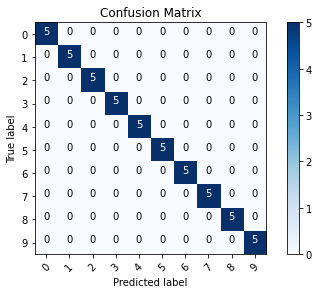

In [83]:
cm_plot_labels = list(test_batches.class_indices.keys())
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

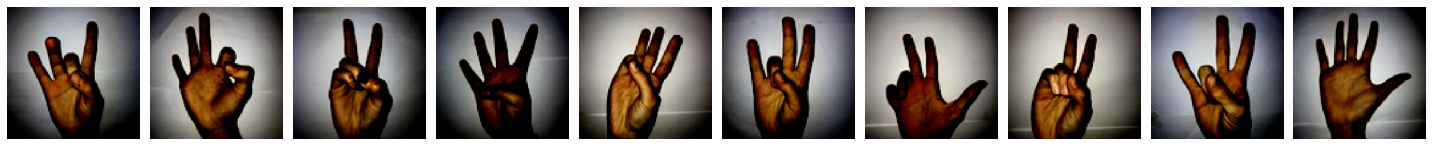

In [102]:
# Image('data/sign_language/train/0/IMG_4193.JPG')
# Grabing one single batch
imgs, labels = next(train_batches)
# Mobilenet filter subtracts average fromm all colours vectors 
plot(imgs)

## Data Argumentation

In [87]:
# note that we are using all "range" parameters so data will change within a range
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, channel_shift_range=10., horizontal_flip=True)

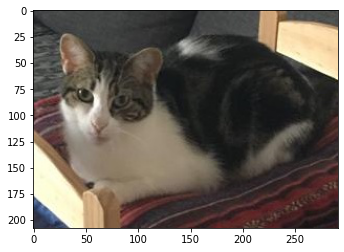

In [91]:
img_path = "data/albano/sample.2.jpg"
image = np.expand_dims(plt.imread(img_path), 0)
plt.imshow(image[0])

In [96]:
aug_iter = gen.flow(image)
aug_images = [next(aug_iter)[0].astype(np.uint8) for _ in range(10)]

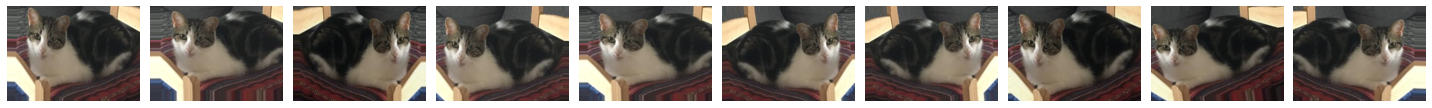

In [97]:
plot(aug_images)

## References

1. https://www.tensorflow.org/guide/keras
1. https://www.kaggle.com/zalando-research/fashionmnist
1. https://keras.io/api/models/
1. https://keras.io/api/layers/activations/
1. https://www.tutorialspoint.com/keras/keras_layers.htm
1. https://www.youtube.com/watch?v=qFJeN9V1ZsI (****)
1. https://www.youtube.com/watch?v=J6Ok8p463C4 (****)
1. https://keras.io/guides/serialization_and_saving/
1. https://keras.io/api/optimizers/
1. https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
1. https://deeplizard.com/learn/video/RznKVRTFkBY (****)
1. https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c
1. https://keras.io/api/applications/vgg/
1. https://arxiv.org/pdf/1409.1556.pdf (*****)
1. https://github.com/ardamavi/Sign-Language-Digits-Dataset
1. https://ai.googleblog.com/2017/06/mobilenets-open-source-models-for.html
1. https://arxiv.org/pdf/1704.04861.pdf